<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#quick-start" data-toc-modified-id="quick-start-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>quick start</a></span><ul class="toc-item"><li><span><a href="#Resources" data-toc-modified-id="Resources-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Resources</a></span></li></ul></li><li><span><a href="#FULL-MODEL" data-toc-modified-id="FULL-MODEL-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>FULL MODEL</a></span><ul class="toc-item"><li><span><a href="#Packages" data-toc-modified-id="Packages-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Packages</a></span><ul class="toc-item"><li><span><a href="#Qnetwork" data-toc-modified-id="Qnetwork-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Qnetwork</a></span></li></ul></li><li><span><a href="#POMDP-RNN-Game" data-toc-modified-id="POMDP-RNN-Game-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>POMDP RNN Game</a></span></li><li><span><a href="#Results" data-toc-modified-id="Results-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Results</a></span><ul class="toc-item"><li><span><a href="#Standard-setting：-grid-=--(3,7)，-holes-=-0" data-toc-modified-id="Standard-setting：-grid-=--(3,7)，-holes-=-0-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Standard setting： grid =  (3,7)， holes = 0</a></span></li><li><span><a href="#Model-Tranining" data-toc-modified-id="Model-Tranining-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Model Tranining</a></span></li><li><span><a href="#decoding-vs-performance" data-toc-modified-id="decoding-vs-performance-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>decoding vs performance</a></span></li><li><span><a href="#learning-rate-vs-performance" data-toc-modified-id="learning-rate-vs-performance-2.3.4"><span class="toc-item-num">2.3.4&nbsp;&nbsp;</span>learning rate vs performance</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-2.3.5"><span class="toc-item-num">2.3.5&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#Anlytic-part-,-check-the-behaviour-correspond-to-each-decoding-level-and-explain-why" data-toc-modified-id="Anlytic-part-,-check-the-behaviour-correspond-to-each-decoding-level-and-explain-why-2.3.6"><span class="toc-item-num">2.3.6&nbsp;&nbsp;</span>Anlytic part , check the behaviour correspond to each decoding level and explain why</a></span></li></ul></li><li><span><a href="#PCA" data-toc-modified-id="PCA-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>PCA</a></span></li></ul></li></ul></div>

# quick start 

Test what is the decoding change for single size training 

## Resources

* [*The* Reinforcement learning book from Sutton & Barto](http://incompleteideas.net/sutton/book/the-book-2nd.html)
* [The REINFORCE paper from Ronald J. Williams (1992)](http://www-anw.cs.umass.edu/~barto/courses/cs687/williams92simple.pdf)


# FULL MODEL

## Packages

In [2]:
# posnet without regulization 

%load_ext autoreload
%autoreload 2

import numpy as np
from itertools import count
import random

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.autograd as autograd
from torch.autograd import Variable
from torch.nn import init
from torch.nn import DataParallel

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.animation
from IPython.display import HTML

import POMDPgame_bars
from POMDPgame_bars import*

import POMDPgame_basic
from POMDPgame_basic import*

import POMDPgame_holes
from POMDPgame_holes import*


import RNN
from RNN import *

import navigation2
from navigation2 import*

import Nets
from Nets import*

%matplotlib inline

### Qnetwork

To select actions we take maximum of Q value, corresponding to certain move.

For the liquid state approach to work, you need a lot of neurons as surplus or enough hidden to hidden connectivity to make it have an effect.

##  POMDP RNN Game

In this game , we use a new reward function determined by game, if the agent achieves the goal before 50, reward is 1. If time pass 50 reward is 0.5, once time pass 100 agent gets a reward of -0.5 .  Practically, this is found to be easier to learn than the rewards as a continous function of time.  Tf the agent learns to search in a efficient way, the largest possible way for search is to firstly arrive at corner then goes to the goal, which, takes about 50 steps, it is reasonble to make 50 and 100 as milestone thing.  Also in principe as the game doesn't have a timer , it is not if it can use a reward as funtion of time

3 condition for ending , when pass time limit, game over

For weight update, it seems to be better do it after episode, as it makes non-sense evaluate strategy during episode, but a the end. Also, it is much quicker. 

A programming of MDP here, hidden state is as state of enviroment

task <class 'POMDPgame_basic.GameBasic'>
task <class 'POMDPgame_holes.GameHole'>
task <class 'POMDPgame_bars.GameBar'>
task <class 'POMDPgame_scale.GameScale'>
task <class 'POMDPgame_scale_x.GameScale_x'>
task <class 'POMDPgame_scale_y.GameScale_y'>
task <class 'POMDPgame_implicit.GameImplicit'>


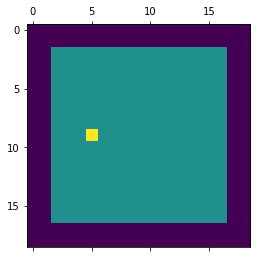

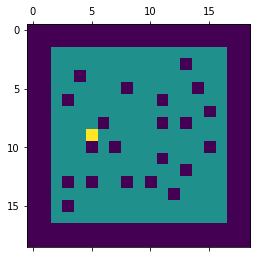

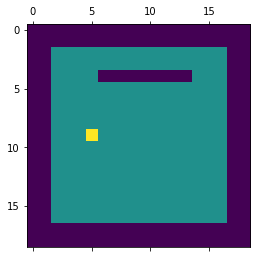

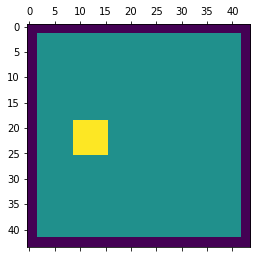

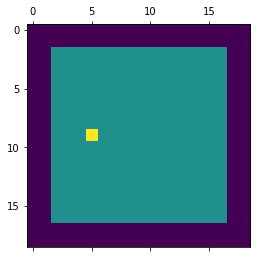

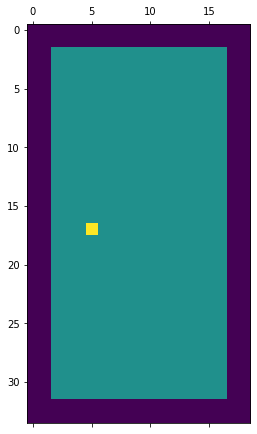

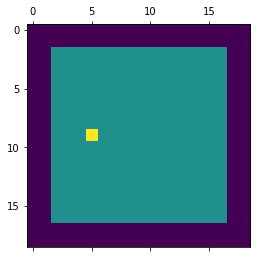

In [3]:
basicgame = CreateGame(GameBasic, holes = 0)
basicgame.reset(size = 15, reward_control=0)
plt.matshow(basicgame.grid.grid)

holegame = CreateGame(GameHole, holes = 50)
holegame.reset(size = 15, reward_control=0)
plt.matshow(holegame.grid.grid)

bargame = CreateGame(GameBar, holes = 0)
bargame.reset(size = 15, reward_control=0)
plt.matshow(bargame.grid.grid)

scalegame = CreateGame(GameScale, holes = 0)
scalegame.reset(reward_control=0)
plt.matshow(scalegame.grid.grid)

scalegame_x = CreateGame(GameScale_x, holes = 0)
scalegame_x.reset(reward_control=0)
plt.matshow(scalegame_x.grid.grid)

scalegame_y = CreateGame(GameScale_y, holes = 0)
scalegame_y.reset(reward_control=0)
plt.matshow(scalegame_y.grid.grid)

Imp_game = CreateGame(GameImplicit, holes = 0)
Imp_game.reset(size = 15, reward_control=0)
plt.matshow(Imp_game.grid.grid)

Think of how to make this traning stable, adding exploration noise , intenral noise or environmental variability like multiple mazes  

In [ ]:
trial = 0
tasks = ['basic']
episodes = [200]
# iterations = [1, 1, 1, 1, 1, 1, 1]
for n, task in zip(episodes, tasks):
        Task =  MultipleTasks(task = task, weight_write = 'weights_cpu/rnn_1515tanh512_checkpoint{}'.format(trial)\
                              , noise = 0.0)
        weight_read = Task.weight
        weight_write = 'weights_' + task + '/rnn_1515tanh512_checkpoint{}'.format(trial)
        if task == 'scale':
            size_train = np.arange(10, 51, 10)
        else:
            size_train = [15]
        if task == 'bar':
            iterations = 5
            epochs = 100
        else:
            iterations = 50
            epochs = 10
        print ('start', size_train)
        Task.qlearn(task, weight_read,  weight_write, episodes = n, noise = 0, size_train = size_train, size_test=[15], iterations = iterations, epochs = epochs, lr_rate = 1e-5, batch_size = 32)

task <class 'POMDPgame_basic.GameBasic'>
basic
start [15]


/home/tie/.conda/envs/torch/lib/python3.7/site-packages/torch/tensor.py:293: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


loss tensor(3421.3574, device='cuda:1', grad_fn=<AddBackward0>)
loss tensor(3223.1174, device='cuda:1', grad_fn=<AddBackward0>)
loss tensor(3071.5986, device='cuda:1', grad_fn=<AddBackward0>)
loss tensor(2956.3572, device='cuda:1', grad_fn=<AddBackward0>)
loss tensor(2870.8220, device='cuda:1', grad_fn=<AddBackward0>)
loss tensor(2799.5159, device='cuda:1', grad_fn=<AddBackward0>)
loss tensor(2731.1448, device='cuda:1', grad_fn=<AddBackward0>)
loss tensor(2664.8198, device='cuda:1', grad_fn=<AddBackward0>)
loss tensor(2600.2581, device='cuda:1', grad_fn=<AddBackward0>)
loss tensor(2536.4783, device='cuda:1', grad_fn=<AddBackward0>)
clear session data 15607750656
basic performance -0.796875
loss tensor(1883.4951, device='cuda:1', grad_fn=<AddBackward0>)
loss tensor(1533.0658, device='cuda:1', grad_fn=<AddBackward0>)
loss tensor(1291.3857, device='cuda:1', grad_fn=<AddBackward0>)
loss tensor(1145.5903, device='cuda:1', grad_fn=<AddBackward0>)
loss tensor(1077.4025, device='cuda:1', grad_

In [ ]:
# moving bar train noise 0.2
trial = 399
tasks = ['hole', 'basic', 'bar', 'scale', 'scale_x', 'scale_y', 'implicit']
episodes = [30, 10, 30, 10, 30, 30, 30]
# iterations = [1, 1, 1, 1, 1, 1, 1]
for n, task in zip(episodes, tasks):
        Task =  MultipleTasks(task = task, weight_write = 'weights_cpu_pos1/rnn_1515tanh512_checkpoint{}'.format(trial)\
                              , noise = 0.0)
        weight_read = Task.weight
        weight_write = 'weights_' + task + '/rnn_1515tanh512_checkpoint{}'.format(trial)
        if task == 'scale':
            size_train = np.arange(10, 51, 10)
        else:
            size_train = [15]
        if task == 'hole':
            iterations = 5
            epochs = 100
            print ('hole', iterations, epochs)
        else:
            iterations = 50
            epochs = 10
        print ('start', size_train, Task.game.holes)
        Task.qlearn(task, weight_read,  weight_write, episodes = n, noise = 0, size_train = size_train, size_test=[15], iterations = iterations
                   , epochs = epochs)

In [5]:
torch.norm(Task.game.net.h2h)

tensor(35.9633)

### measure decoding 

Decoding accuracy decreases, there are two possible reasons: 
1, decoding has bias,  information of position is only refleted by decoding, if there is certain bias , it is not trustable
2, it is the real measure of information, so there are less spatial information about space, or an effect decoupling/disentanglement of position. This can be due the network succeed at finding an even lower diemnsion object which gives successful performance.  The representation deceases its information to input in a sense. 

This can be linked to receptive field by looking at how space is represented. 